# Auto Sale eBay Germany

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('seaborn')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Auto Sales ebay Germany Random 50k Cleaned\autos_random_50k_cleaned.csv")
df.head()

,Unnamed: 0,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,1,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17
1,2,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15
2,3,2016-03-09 20:59,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,2009,automatik,220,xc_reihe,150000,3,diesel,volvo,ja,2016-03-09 0:00,72762,2016-03-16 5:46
3,4,2016-03-26 15:55,Kombi_Technisch_super_in_Schuss,750,test,kombi,2000,manuell,112,mondeo,150000,12,benzin,ford,Unknown,2016-03-26 0:00,39446,2016-03-26 15:55
4,5,2016-03-29 14:47,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,2004,manuell,131,a4,150000,7,diesel,audi,nein,2016-03-29 0:00,51373,2016-03-29 14:47


In [12]:
df.shape

(37866, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37866 entries, 0 to 37865
Data columns (total 18 columns):
Unnamed: 0            37866 non-null int64
date_crawled          37866 non-null object
car_name              37866 non-null object
price_EUR             37866 non-null int64
ab_test               37866 non-null object
vehicle_type          37866 non-null object
registration_year     37866 non-null int64
transmission          37866 non-null object
power_ps              37866 non-null int64
model                 37866 non-null object
odometer_km           37866 non-null int64
registration_month    37866 non-null int64
fuel_type             37866 non-null object
brand                 37866 non-null object
unrepaired_damage     37866 non-null object
ad_created            37866 non-null object
postal_code           37866 non-null int64
last_seen             37866 non-null object
dtypes: int64(7), object(11)
memory usage: 5.2+ MB


In [14]:
df.describe().round()

,Unnamed: 0,price_EUR,registration_year,power_ps,odometer_km,registration_month,postal_code
count,37866.0,37866.0,37866.0,37866.0,37866.0,37866.0,37866.0
mean,25021.0,6838.0,2004.0,130.0,124271.0,6.0,51744.0
std,14458.0,11616.0,7.0,65.0,39765.0,3.0,25656.0
min,1.0,500.0,1929.0,1.0,5000.0,1.0,1067.0
25%,12500.0,1700.0,2000.0,86.0,100000.0,4.0,31368.0
50%,25026.0,3950.0,2004.0,116.0,150000.0,6.0,50998.0
75%,37601.0,8500.0,2008.0,156.0,150000.0,9.0,72469.0
max,49998.0,820000.0,2016.0,1403.0,150000.0,12.0,99998.0


In [15]:
df.isnull().sum()

Unnamed: 0            0
date_crawled          0
car_name              0
price_EUR             0
ab_test               0
vehicle_type          0
registration_year     0
transmission          0
power_ps              0
model                 0
odometer_km           0
registration_month    0
fuel_type             0
brand                 0
unrepaired_damage     0
ad_created            0
postal_code           0
last_seen             0
dtype: int64

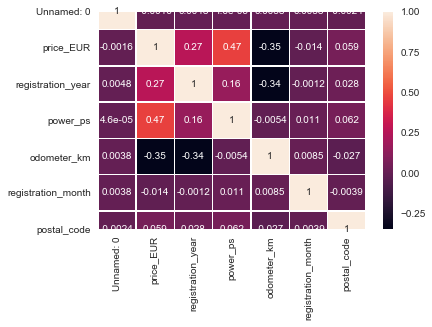

In [16]:
sb.heatmap(df.corr(), annot = True, linewidths = 0.5)

In [17]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17
1,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15
2,2016-03-09 20:59,Volvo_XC60_D5_AWD_Aut.,5200,test,suv,2009,automatik,220,xc_reihe,150000,3,diesel,volvo,ja,2016-03-09 0:00,72762,2016-03-16 5:46
3,2016-03-26 15:55,Kombi_Technisch_super_in_Schuss,750,test,kombi,2000,manuell,112,mondeo,150000,12,benzin,ford,Unknown,2016-03-26 0:00,39446,2016-03-26 15:55
4,2016-03-29 14:47,Audi_A4_1.9_TDI_quattro_Delphingrau,3522,test,limousine,2004,manuell,131,a4,150000,7,diesel,audi,nein,2016-03-29 0:00,51373,2016-03-29 14:47


Text(0.5, 1.0, 'Top 10 most sold cars')

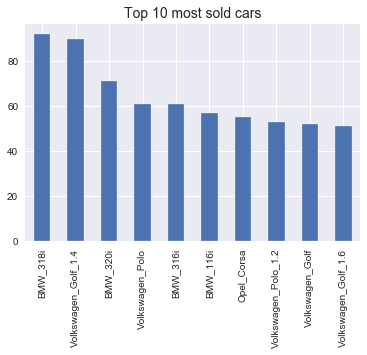

In [21]:
df['car_name'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top 10 most sold cars', fontdict = {'size':14})

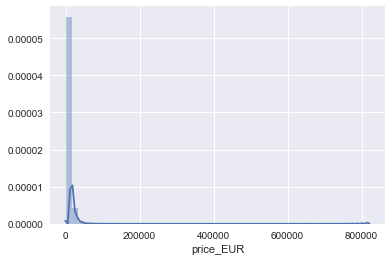

In [22]:
sb.distplot(df['price_EUR'])

In [35]:
df = df[df['price_EUR']>=100000]

In [36]:
df['price_EUR'].max()

619000

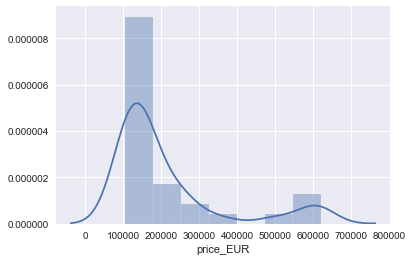

In [37]:
sb.distplot(df['price_EUR'])

In [34]:
df['price_EUR'].max()

619000